In [1]:
# %matplotlib inline
%matplotlib notebook

try:
    from importlib import reload
except:
    pass

from __future__ import print_function ## Force python3-like printing

from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table,Column

import pycoco as pcc

reload(pcc) ## FOR DEV
reload(pcc.defaults)
reload(pcc.functions)
reload(pcc.classes)

import pyCoCo as pccsims

In [2]:
def convert_column_string_encoding(column):
    column = Column([pcc.utils.b(x) for x in column.data], name = column.name)
    return column

def get_mjdmax_BessellV(sn):
    v = sn.lcfit.spline["BessellV"]    
    mjd_spline = np.arange(np.nanmin(sn.phot.data["BessellV"]["MJD"]), 
                 np.nanmax(sn.phot.data["BessellV"]["MJD"]),
                 0.001)
    w = np.where(v(mjd_spline) == np.nanmax(v(mjd_spline)))

    mjdmax = mjd_spline[w]
    
    return mjdmax

In [3]:
filter_path = "/Users/berto/Code/CoCo/data/filters"
coco_root_path = "/Users/berto/Code/CoCo"
coco = pccsims.pyCoCo(pcc.utils.b(filter_path), pcc.utils.b(coco_root_path))

Load in an templates object 

/Users/berto/Code/CoCo/data/lc/SN2009jf.dat
/Users/berto/Code/CoCo/data/lc/SN2009jf.dat


<IPython.core.display.Javascript object>


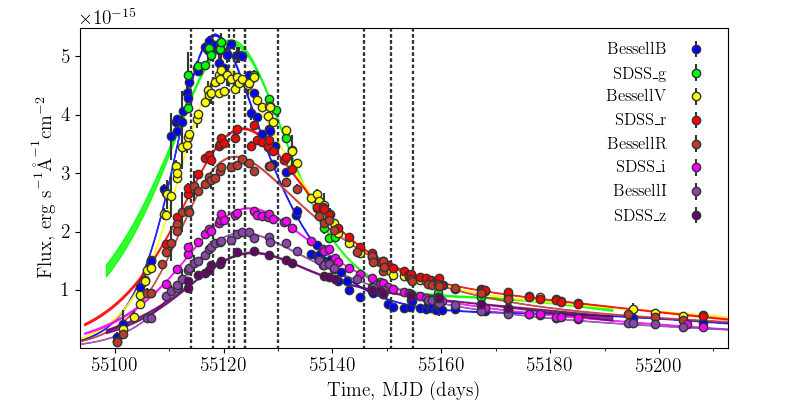

In [24]:
# snname = "SN2007uy"
snname = "SN2009jf"

sn = pcc.SNClass(snname)

phot_path = os.path.join(coco_root_path, "data/lc/", snname + ".dat")
speclist_path = os.path.join(str(coco_root_path),"lists/" + snname + ".list")
recon_filename = os.path.abspath(os.path.join(str(coco_root_path), "recon/", snname + ".dat"))

print(phot_path)
sn.load_phot(path = phot_path)
# sn.phot.plot()
sn.get_lcfit(recon_filename)

sn.load_list(path = speclist_path)
sn.load_spec()
# sn.load_mangledspec()
# sn.plot_spec()
# sn.plot_mangledspec()
sn.plot_lc(multiplot = False)

inputs:

* **`snname`**
* **`redshift`**
* **`absmag offset`**
* **`EBV MW`**
* **`EBV Host`**
* **`Rv`**
* **`MJD at Peak`**

* **`MJD to simulate`**
* **`filters to simulate`**

In [6]:
sn.lcfit.get_fit_splines()

Quick check that the fit spline fits the fit (in Bessell V).
Note: spline sampled at MJDOBS so looks slightly linear.

<IPython.core.display.Javascript object>


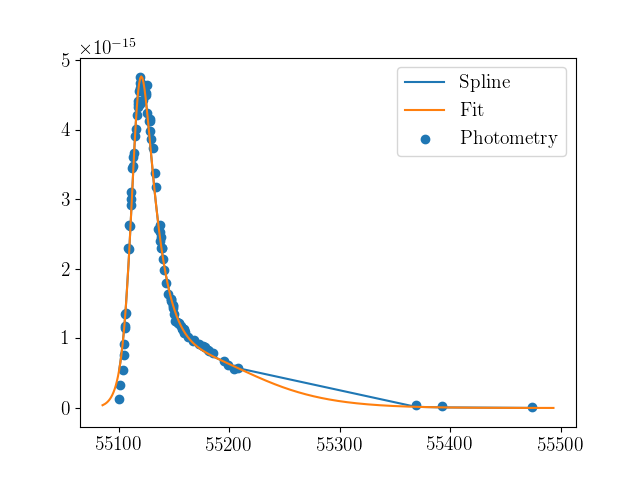

In [7]:
plt.plot(sn.phot.data["BessellV"]["MJD"], sn.lcfit.spline["BessellV"](sn.phot.data["BessellV"]["MJD"]), label = r"$\textnormal{Spline}$")
plt.scatter(sn.phot.data["BessellV"]["MJD"], sn.phot.data["BessellV"]["flux"], label = r"$\textnormal{Photometry}$")
plt.plot(sn.lcfit.data["BessellV"]["MJD"], sn.lcfit.data["BessellV"]["flux"], label = r"$\textnormal{Fit}$")
plt.legend()

In [8]:
mjdmax = get_mjdmax_BessellV(sn)[0]

filters_to_sim = convert_column_string_encoding(sn.phot.phot["filter"]).data
mjd_to_sim = sn.phot.phot["MJD"].data

In [9]:
print(mjdmax)
print(mjd_to_sim)
print(filters_to_sim)

55120.5659999
[ 55100.5      55100.5      55100.5      55101.61     55101.61     55101.61
  55103.58     55104.58     55104.68     55104.68     55105.55     55105.6
  55106.       55106.       55106.       55106.63     55106.63     55106.63
  55106.63     55106.64     55108.62     55108.97     55108.97     55109.41
  55109.41     55109.41     55109.41     55109.41     55109.41     55109.61
  55110.33     55110.33     55110.33     55110.33     55111.31     55111.31
  55111.36     55111.36     55111.36     55111.36     55111.38     55111.38
  55111.38     55111.38     55111.38     55111.38     55112.31     55112.31
  55112.31     55112.31     55112.57     55113.26     55113.26     55113.39
  55113.39     55113.39     55113.39     55113.39     55113.39     55113.39
  55113.39     55113.55     55113.55     55113.55     55113.55     55113.56
  55113.56     55113.56     55113.56     55114.64     55114.64     55115.14
  55115.14     55115.39     55115.39     55115.39     55115.39     55115.39

In [10]:
tablepath = "/Users/berto/Code/verbose-enigma/testdata/info/info.dat"

info = Table.read(tablepath, format = "ascii.commented_header")


In [11]:
z_obs = info[np.where(info["snname"] == "SN2009jf")]["z_obs"].data[0]
print(z_obs)

0.008


In [20]:
flux, flux_err = coco.simulate(b"SN2009jf", 
                    0.008, 0.0, 0.0000, 0.0000, 3.1, 
                    mjdmax, mjd_to_sim, 
                    filters_to_sim)

# flux, flux_err = coco.simulate(b"SN2009jf", 
#                     0.008, 0.0, 0.1, 0.1, 3.1, 
#                     mjdmax, mjd_to_sim, 
#                     filters_to_sim)

In [21]:
pccsims.__file__

'/Users/berto/Code/CoCo/pyCoCo.cpython-36m-darwin.so'

In [22]:
p = pcc.PhotometryClass()

p.load_table(pcc.utils.simulate_out_to_ap_table(mjd_to_sim, flux, flux_err, filters_to_sim))

<IPython.core.display.Javascript object>


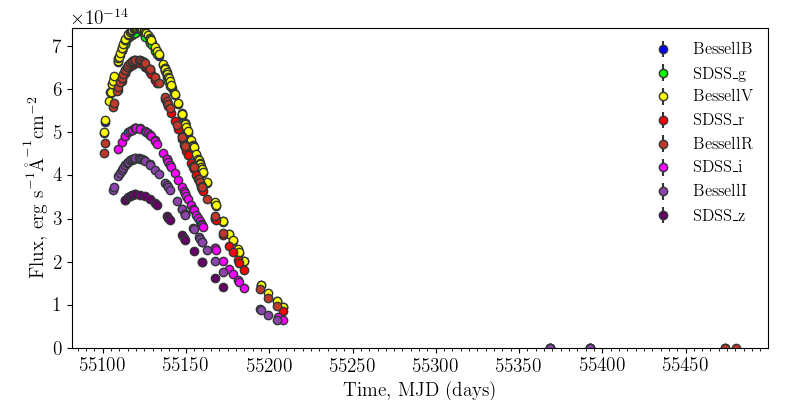

In [23]:
p.plot(legend=True)

In [ ]:
plt.scatter(p.data["BessellV"]["MJD"], p.data["BessellV"]["flux"]/5.0, label = "Synthetic")
plt.scatter(sn.phot.data["BessellB"]["MJD"], sn.phot.data["BessellB"]["flux"], label = "Real")

plt.ylim(0, np.nanmax(np.append(p.data["BessellV"]["flux"], sn.phot.data["BessellB"]["flux"])))
plt.legend()

In [ ]:
sn.plot_lc(["BessellB"], multiplot = False)

In [ ]:
p.plot(["BessellB"])

In [ ]:
sn.plot_lc(multiplot=False)

In [ ]:
sn.load_mangledspec()

In [ ]:
sn.plot_mangledspec()

In [ ]:
sn.plot_spec()

In [ ]:
mjdmax = get_mjdmax_BessellV(sn)[0]

filters_to_sim = convert_column_string_encoding(sn.phot.data["BessellB"]["filter"]).data
mjd_to_sim = sn.phot.data["BessellB"]["MJD"].data

flux, flux_err = coco.simulate(b"SN2009jf", 
                    z_obs, -0.0, 0.2, 0.3, 3.1, 
                    mjdmax, mjd_to_sim, 
                    filters_to_sim)

In [ ]:
plt.scatter(mjd_to_sim,sn.phot.data["BessellB"]["flux"])
plt.plot(sn.lcfit.data["BessellB"]["MJD"], sn.lcfit.data["BessellB"]["flux"])

plt.ylim(0, np.nanmax(sn.phot.data["BessellB"]["flux"])*1.1)

In [ ]:
p = pcc.PhotometryClass()

p.load_table(pcc.utils.simulate_out_to_ap_table(mjd_to_sim, flux, flux_err, filters_to_sim))

In [ ]:
p.plot()

In [ ]:
# s = pcc.SpectrumClass()

# s.load("SN2009jf_55106.120000.spec", directory="/Users/berto/Code/CoCo/spectra/")

# s.plot()

In [ ]:
# s = pcc.SpectrumClass()
# s.load("SN2009jf_55108.130000.spec", directory="/Users/berto/Code/CoCo/spectra/")
# s.plot()

In [ ]:
# s = pcc.SpectrumClass()
# s.load("SN2009jf_55114.060000.spec", directory="/Users/berto/Code/CoCo/spectra/")
# s.plot()

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

from astropy.table import Table
def load_coords(filename = "sncoordinates.list"):
    """

    """
    path = os.path.abspath(os.path.join(pcc.__path__[0], os.path.pardir, filename))
    coordtable = Table.read(path, format = 'ascii.commented_header')
    return coordtable

In [ ]:
# %timeit load_coords()

In [ ]:
cootable = load_coords()

In [ ]:
%%timeit

snname = "SN2009jf"
w = np.where(cootable["snname"] == snname)
c = SkyCoord(cootable["RA"][w], cootable["Dec"][w], frame='icrs')


In [ ]:
c.ra.deg[0], c.dec.deg[0]

In [ ]:
import sfdmap

In [ ]:
m = sfdmap.SFDMap()

In [ ]:
m.ebv(c.ra.deg[0], c.dec.deg[0], unit = 'degree')